In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
covid_data_raw = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv")
covid_data_raw.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [3]:
print(f"Data available for {covid_data_raw['Date'].unique().size} days")

Data available for 270 days


In [4]:
covid_data_clean = covid_data_raw.drop(["Province/State"], axis=1)
covid_data_clean.head()

,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,33.93911,67.709953,0,0.0,0


In [5]:
covid_data_clean.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,72090.000000,72090.000000,7.209000e+04,6.831000e+04,72090.000000
mean,20.961559,23.343773,4.284619e+04,2.760750e+04,1610.020807
std,24.882193,70.429778,3.257632e+05,2.119790e+05,10272.269230
min,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.428055,-15.310100,1.600000e+01,3.000000e+00,0.000000
50%,22.300000,20.939400,4.400000e+02,2.020000e+02,6.000000
75%,41.153300,80.771797,4.688750e+03,2.150000e+03,89.000000
max,71.706900,178.065000,8.106384e+06,6.524595e+06,219286.000000


In [6]:
covid_data_clean.describe(include="O")

,Date,Country/Region
count,72090,72090
unique,270,189
top,2020-02-16,China
freq,267,8910


In [7]:
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72090 non-null  object 
 1   Country/Region  72090 non-null  object 
 2   Lat             72090 non-null  float64
 3   Long            72090 non-null  float64
 4   Confirmed       72090 non-null  int64  
 5   Recovered       68310 non-null  float64
 6   Deaths          72090 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [8]:
covid_data_clean['Date'] = pd.to_datetime(covid_data_clean['Date'])
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            72090 non-null  datetime64[ns]
 1   Country/Region  72090 non-null  object        
 2   Lat             72090 non-null  float64       
 3   Long            72090 non-null  float64       
 4   Confirmed       72090 non-null  int64         
 5   Recovered       68310 non-null  float64       
 6   Deaths          72090 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.9+ MB


In [9]:
covid_data_clean

,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...
72085,2020-10-13,Zimbabwe,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,-19.015438,29.154857,8099,7673.0,231


In [10]:
covid_data_clean=covid_data_clean.sort_values(by='Date')
covid_data_clean[30:55]

,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths
58590,2020-01-22,Serbia,44.016500,21.005900,0,0.0,0
62640,2020-01-22,Switzerland,46.818200,8.227500,0,0.0,0
13500,2020-01-22,Canada,52.939900,-73.549100,0,NaN,0
13770,2020-01-22,Canada,52.939900,-106.450900,0,NaN,0
54270,2020-01-22,Paraguay,-23.442500,-58.443800,0,0.0,0
17550,2020-01-22,China,39.549000,116.130600,1,0.0,0
54540,2020-01-22,Peru,-9.190000,-75.015200,0,0.0,0
17280,2020-01-22,China,19.195900,109.745300,4,0.0,0
54810,2020-01-22,Philippines,12.879721,121.774017,0,0.0,0
17010,2020-01-22,China,26.815400,106.874800,1,0.0,0


In [11]:
covid_data_clean.isna().sum()

Date                 0
Country/Region       0
Lat                  0
Long                 0
Confirmed            0
Recovered         3780
Deaths               0
dtype: int64

In [12]:
covid_missing_recovery = covid_data_clean[covid_data_clean.isnull().any(axis=1)]
covid_missing_recovery.describe(include="O")

,Country/Region
count,3780
unique,1
top,Canada
freq,3780


In [13]:
covid_data_raw[covid_data_raw['Country/Region'] == "Canada"]

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
10530,2020-01-22,Canada,Alberta,53.9333,-116.5765,0,NaN,0
10531,2020-01-23,Canada,Alberta,53.9333,-116.5765,0,NaN,0
10532,2020-01-24,Canada,Alberta,53.9333,-116.5765,0,NaN,0
10533,2020-01-25,Canada,Alberta,53.9333,-116.5765,0,NaN,0
10534,2020-01-26,Canada,Alberta,53.9333,-116.5765,0,NaN,0
...,...,...,...,...,...,...,...,...
14305,2020-10-13,Canada,Yukon,64.2823,-135.0000,15,NaN,0
14306,2020-10-14,Canada,Yukon,64.2823,-135.0000,15,NaN,0
14307,2020-10-15,Canada,Yukon,64.2823,-135.0000,15,NaN,0
14308,2020-10-16,Canada,Yukon,64.2823,-135.0000,15,NaN,0


Data for Canada will be dropped as there are no data for recovered patients

In [14]:
covid_data_clean.dropna(inplace=True)
covid_data_clean.head()

,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,33.939110,67.709953,0,0.0,0
58860,2020-01-22,Seychelles,-4.679600,55.492000,0,0.0,0
59130,2020-01-22,Sierra Leone,8.460555,-11.779889,0,0.0,0
59400,2020-01-22,Singapore,1.283300,103.833300,0,0.0,0
59670,2020-01-22,Slovakia,48.669000,19.699000,0,0.0,0


In [15]:
covid_data_clean['Recovered'] = covid_data_clean['Recovered'].astype(int)
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68310 entries, 0 to 72089
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            68310 non-null  datetime64[ns]
 1   Country/Region  68310 non-null  object        
 2   Lat             68310 non-null  float64       
 3   Long            68310 non-null  float64       
 4   Confirmed       68310 non-null  int64         
 5   Recovered       68310 non-null  int64         
 6   Deaths          68310 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 4.2+ MB


In [16]:
covid_data_prophet = covid_data_clean.drop(["Country/Region", "Lat", "Long"], axis=1)
covid_data_prophet = covid_data_prophet.groupby("Date").sum()
covid_data_prophet.reset_index(level=0, inplace=True)
covid_data_prophet

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2117,52,56
...,...,...,...,...
265,2020-10-13,37941038,26305933,1076439
266,2020-10-14,38319079,26516041,1082430
267,2020-10-15,38723441,26721132,1088498
268,2020-10-16,39132212,26923627,1094573


In [17]:
covid_data_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       270 non-null    datetime64[ns]
 1   Confirmed  270 non-null    int64         
 2   Recovered  270 non-null    int64         
 3   Deaths     270 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.6 KB


In [18]:
covid_prophet_confirmed = covid_data_prophet.drop(["Recovered", "Deaths"], axis=1)
covid_prophet_confirmed = covid_prophet_confirmed.rename(columns={"Date": "ds", "Confirmed": "y"})
covid_prophet_confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2117


In [19]:
prophet_confirmed = Prophet()
prophet_confirmed.fit(covid_prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
covid_prophet_recovered = covid_data_prophet.drop(["Confirmed", "Deaths"], axis=1)
covid_prophet_recovered = covid_prophet_recovered.rename(columns={"Date": "ds", "Recovered": "y"})
covid_prophet_recovered.head()

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [21]:
prophet_recovered = Prophet()
prophet_recovered.fit(covid_prophet_recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
covid_prophet_deaths = covid_data_prophet.drop(["Confirmed", "Recovered"], axis=1)
covid_prophet_deaths = covid_prophet_deaths.rename(columns={"Date": "ds", "Deaths": "y"})
covid_prophet_deaths.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [23]:
prophet_deaths = Prophet()
prophet_deaths.fit(covid_prophet_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future_confirmed = prophet_confirmed.make_future_dataframe(periods=1095)
future_recovered = prophet_recovered.make_future_dataframe(periods=1095)
future_deaths = prophet_deaths.make_future_dataframe(periods=1095)

forecast_confirmed = prophet_confirmed.predict(future_confirmed)
forecast_recovered = prophet_recovered.predict(future_recovered)
forecast_deaths = prophet_deaths.predict(future_deaths)

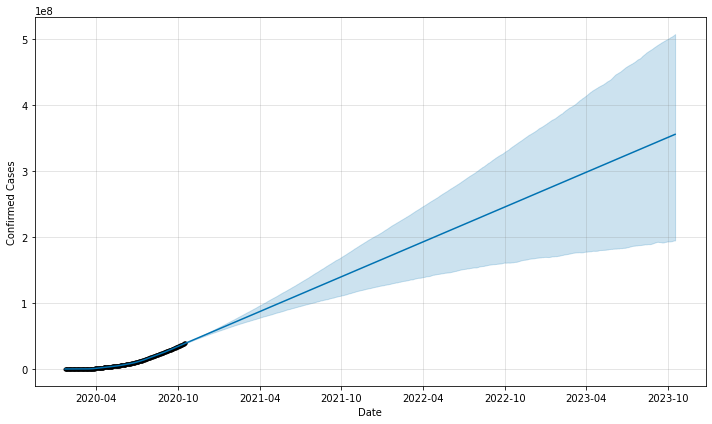

In [25]:
confirmed_plot = prophet_confirmed.plot(forecast_confirmed, xlabel="Date", ylabel="Confirmed Cases")

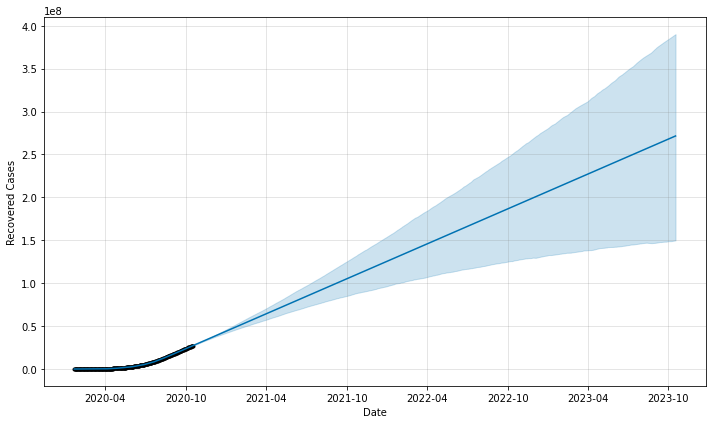

In [26]:
recovered_plot = prophet_recovered.plot(forecast_recovered, xlabel="Date", ylabel="Recovered Cases")

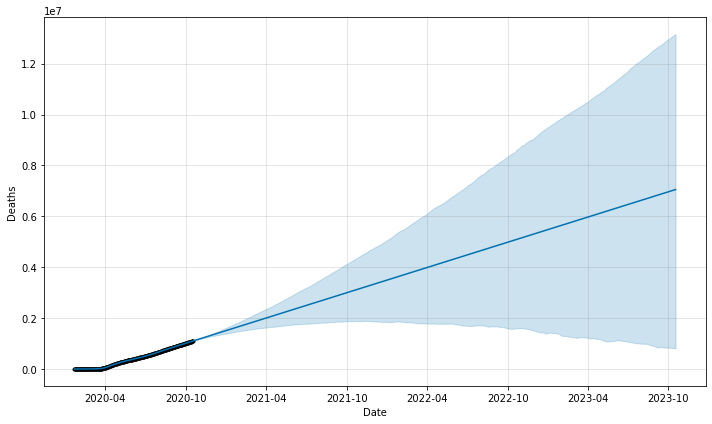

In [27]:
death_plot = prophet_deaths.plot(forecast_deaths, xlabel="Date", ylabel="Deaths")